# **WINE QUALITY PREDICTION USING BINARY LOGISTIC REGRESSION**

**About the dataset**

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Link to dataset:  https://archive.ics.uci.edu/ml/datasets/wine+quality.


**Objectives:**
- Understand the dataset & cleanup (if required)
- Determine which variables influence the overall target output through feature selection
- Build the binary logistic regression model to predict wine quality
- Use evaluation metrics to assess the performance of trained model

# Data Exploration and Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
wine_data = pd.read_csv('/content/drive/MyDrive/Dataset/WineQT.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df = wine_data.copy()
df.drop('Id' , axis = 1, inplace = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1143, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

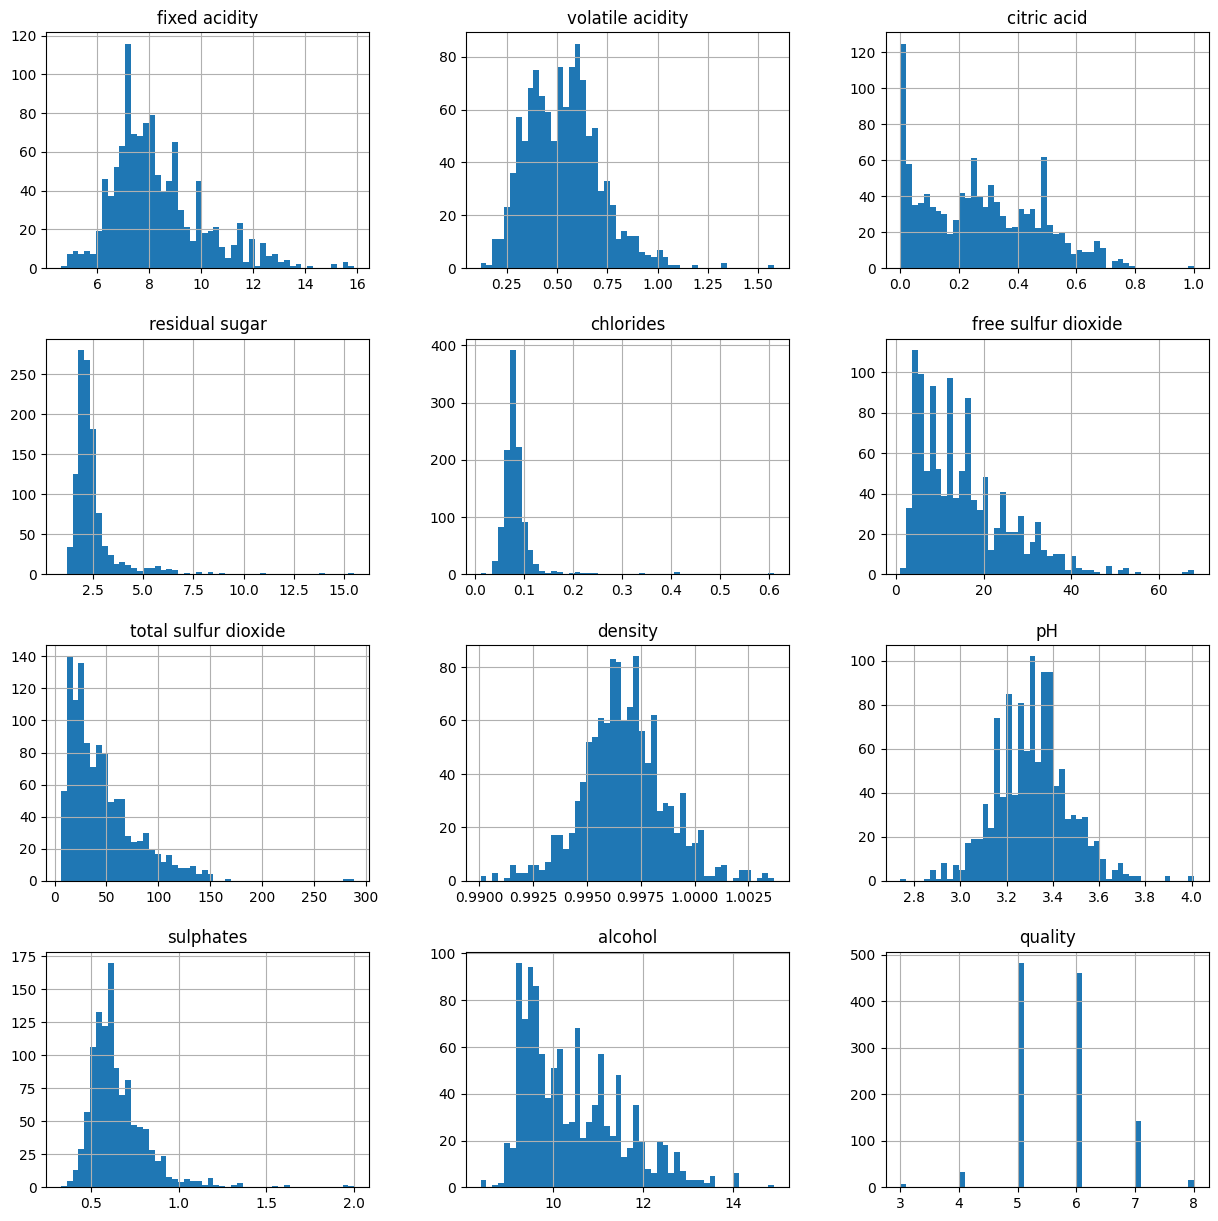

In [8]:
df.hist(bins=50, figsize=(15,15));

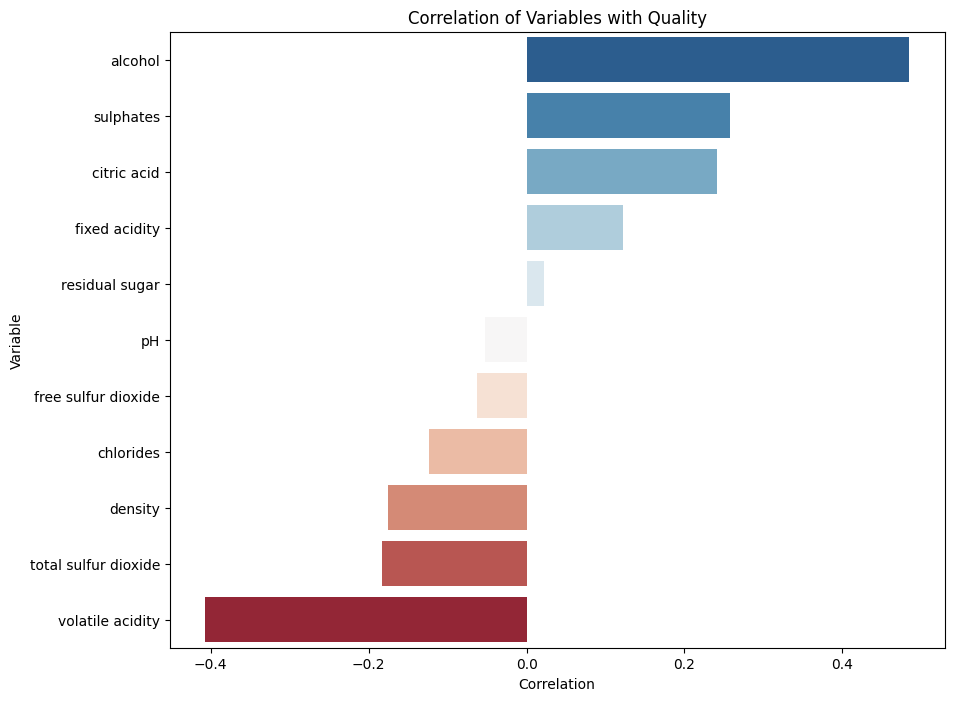

In [9]:
# Visualization of variable correlation against quality (target output)
correlation_matrix = df.corr()

correlation_values = correlation_matrix['quality'].drop('quality')
correlation_values_sorted = correlation_values.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_values_sorted.values, y=correlation_values_sorted.index, palette = 'RdBu_r')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.title('Correlation of Variables with Quality')
plt.show()

The strongest correlation is alcohol (directly proportional to quality) and volatile acidity (inversely proportional to quality).

In [10]:
# Assign binary value to wine quality
# Wine quality >= 6 (Good) ; Binary Value = 1
# Wine quality < 5 (Good) ; Binary Value = 0
df['value'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,value
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


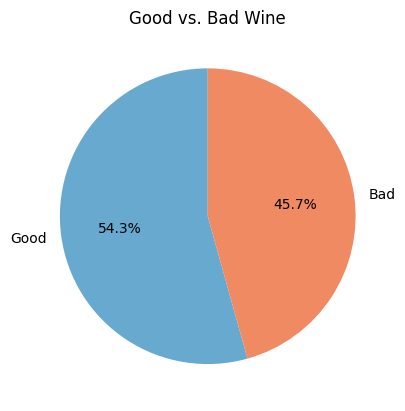

In [11]:
# Pie chart of good vs bad wine
quality_counts = df['value'].value_counts()
labels = ['Good', 'Bad']
colors = ['#67a9cf' , '#ef8a62']
plt.pie(quality_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title("Good vs. Bad Wine")
plt.show()

# Feature Selection


In this section, we aimed to identify the most influential features in predicting the wine quality output. To achieve this, we employed the SelectKBest method with the f_classif scoring function. This approach allowed us to evaluate the statistical relationship between each feature and the target output. By selecting the top-k features based on their F-values, we focused on the most significant predictors of wine quality.

It's worth noting that binary logistic regression, the model used in this project, does not provide feature importance directly as some other models do. Therefore, feature selection becomes particularly valuable in determining the relevant attributes for our model. By selecting the most informative features, we aimed to enhance the performance and interpretability of our logistic regression model, ensuring that only the most influential variables are considered in the prediction process.

In [12]:
# Define X and Y
X = df.drop(['quality', 'value'], axis=1) 
Y = df['value']

In [13]:
# Initialize SelectKBest with top 3 features
selector = SelectKBest(score_func= f_classif, k='all')
selector.fit_transform(X, Y)

# Combine feature and score in one dataframe
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

top_features = feature_scores
top_features

,Feature,Score
10,alcohol,274.544192
1,volatile acidity,140.187279
9,sulphates,66.227971
6,total sulfur dioxide,61.804448
2,citric acid,28.140864
7,density,27.811228
4,chlorides,11.665618
0,fixed acidity,9.044577
5,free sulfur dioxide,5.711893
8,pH,0.265456


Results suggest that *pH* and *residual sugar* have weak influence on the quality and thus will be opted out in the model building process.

# Model Building

In this section, the model for the binary logistic regression is built. The dataset was split into training and testing sets, with 80% used for training and 20% for testing.  The logistic regression model is a common method used for binary classification tasks and is based on the logistic function to estimate the probabilities of the target class. It is a simple yet effective model that can provide insights into the relationship between the input features and the target output.

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'value'],
      dtype='object')

In [15]:
# Define X and Y based on features selected
X = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
        'sulphates', 'alcohol']]
Y = df[['value']] 

In [16]:
# Split the dataset for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Initialize logistic regression body
logreg= LogisticRegression(max_iter = 1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['Binary Quality'] = df['value']
df_test['Predicted Quality'] = y_pred
df_test.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,Binary Quality,Predicted Quality
158,6.8,0.61,0.04,0.057,5.0,10.0,0.99525,0.60,9.500000,0,0
1081,6.9,0.84,0.21,0.074,16.0,65.0,0.99842,0.72,9.233333,1,0
291,7.0,0.58,0.12,0.091,34.0,124.0,0.99560,0.48,10.500000,0,0
538,7.8,0.48,0.68,0.415,14.0,32.0,0.99656,1.06,9.100000,1,0
367,12.5,0.60,0.49,0.100,5.0,14.0,1.00100,0.74,11.900000,1,1


# Model Evaluation

The logistic regression model was evaluated using metrics the following metrics:
- Accuracy: Overall correctness of the model's predictions. Higher accuracy indicates more correct predictions.
- Precision: Measure of minimizing false positive predictions. Higher precision indicates fewer false positives.
- Recall: Measure of capturing all positive instances. Higher recall indicates fewer false negatives.
- F1-score: Balance between precision and recall. Higher F1-score indicates a better balance between precision and recall.

The model was trained on a subset of the data and tested on the remaining data to assess its performance. The predicted labels were compared to the actual labels to measure the accuracy of the model's predictions. Additionally, a confusion matrix was created to visualize the true positive, true negative, false positive, and false negative predictions. These evaluation metrics provide insights into the model's effectiveness in classifying the target variable based on the given features, enabling an assessment of its overall performance.

In [17]:
# Evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('F1 score', metrics.f1_score(y_test, y_pred))

Accuracy: 0.7641921397379913
Recall 0.7795275590551181
Precision 0.792
F1 score 0.7857142857142857


In [18]:
# Classification report
print('CL Report:', metrics.classification_report(y_test, y_pred))

CL Report:               precision    recall  f1-score   support

           0       0.73      0.75      0.74       102
           1       0.79      0.78      0.79       127

    accuracy                           0.76       229
   macro avg       0.76      0.76      0.76       229
weighted avg       0.76      0.76      0.76       229



True Positive: 99
False Positive: 26
True Negative: 76
False Negative: 28


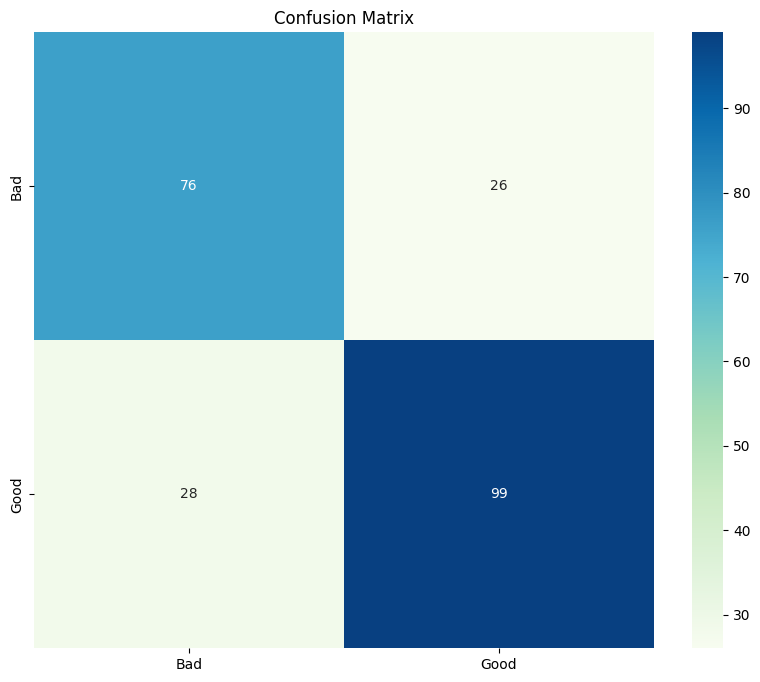

In [19]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix results
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]
true_positive = cm[1, 1]

print("True Positive:", true_positive)
print("False Positive:", false_positive)
print("True Negative:", true_negative)
print("False Negative:", false_negative)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'],annot=True, cmap = 'GnBu')
plt.title('Confusion Matrix')
plt.show()

# Conclusion


The analysis of the wine dataset yielded the following findings:

> Variable correlation to target output:
- The variable with the strongest positive correlation to wine quality is alcohol.
- The variable with the strongest negative correlation to wine quality is volatile acidity.


> Feature selection results:
- The features pH and residual sugar exhibited weak influence on wine quality and were therefore excluded from further analysis.


> Evaluation of the logistic regression model:
- The model achieved an accuracy of 76.42% in predicting wine quality.
- The recall, which measures the ability to correctly identify positive cases, was found to be 77.95%.
- The precision, indicating the proportion of correctly identified positive cases out of all predicted positive cases, was calculated as 79.2%.
- The F1-score, which balances precision and recall, was determined to be 78.6%.


In conclusion, the analysis highlights the following key points:

- Alcohol content positively impacts wine quality.
- Higher levels of volatile acidity are associated with lower wine quality.
- The features pH and residual sugar have minimal influence on wine quality.
- The logistic regression model demonstrates reasonable performance in pr edicting wine quality, with an accuracy rate of 76.42% and balanced recall, precision, and F1-score metrics.